# Задание

Используя набор данных <a href='https://www.kaggle.com/unsdsn/world-happiness?select=2017.csv'>World Happiness Report 2017</a> визуализировать:
1. Топ-5 стран с наивысшими рейтингами по каждому континенту, расположив их на одном мультиокне;
2. График зависимости уровня свободы от уровня счастья, указав на графике отклонения при помощи box whisker chart;
3. Облако точек зависимости уровня "счастья" от уровня ВВП страны;
4. Распределение по столбцу Family для различных значений уровня "счастья";
5. Добавить в набор данных столбец с указанием экономического мира страны ("первый мир", "второй мир" и "третий мир") и визуализировать топ-5 стран с наивысшим рейтингом "счастья" для каждого из миров.


In [5]:
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import os

import pandas as pd

from matplotlib import rc, rcParams
from matplotlib.ticker import FormatStrFormatter, NullFormatter
from matplotlib.ticker import AutoMinorLocator, FixedLocator, MultipleLocator
from random import randint, choice

1. Топ-5 стран с наивысшими рейтингами по каждому континенту, расположив их на одном мультиокне;

In [22]:
df = pd.read_csv('data/2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [24]:
df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

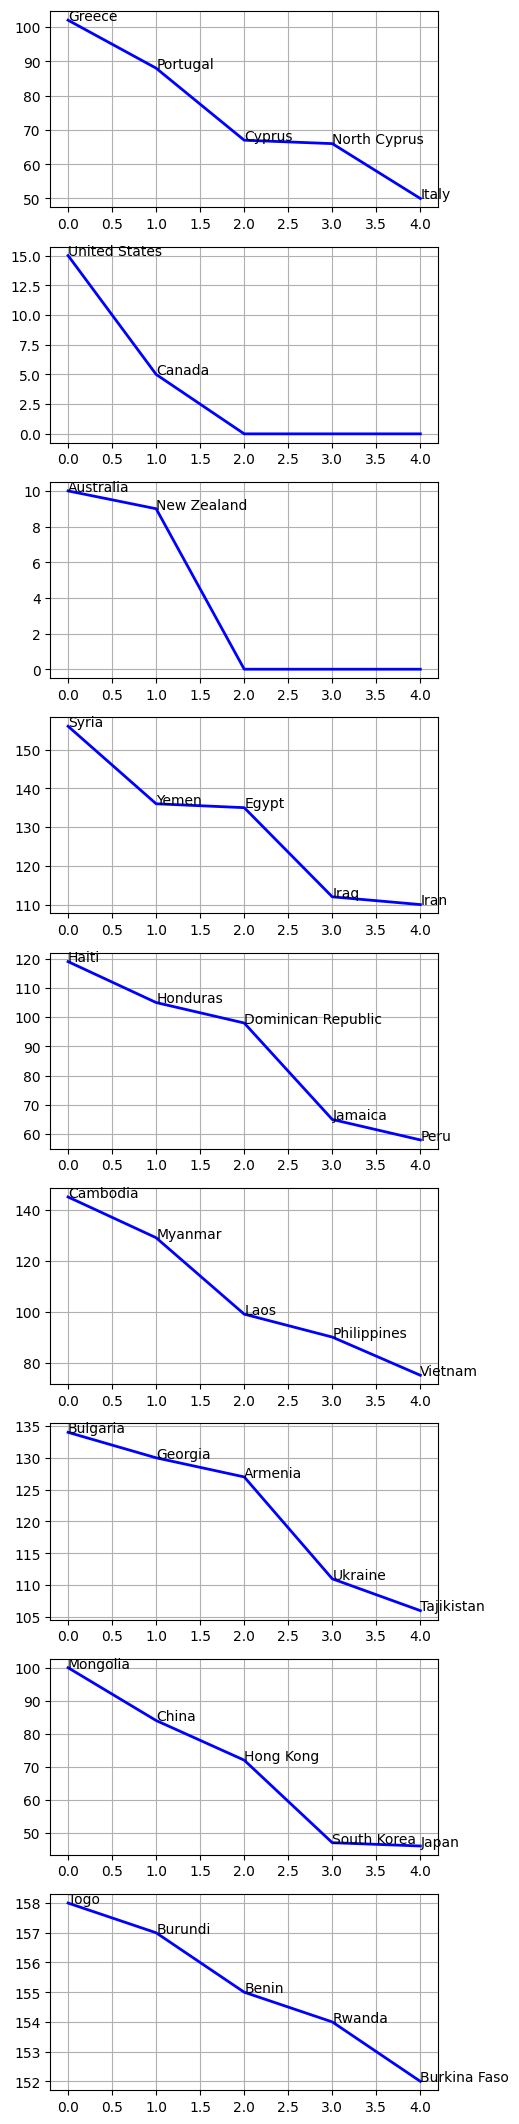

In [39]:
all_continent = list(df["Region"].unique())[0:9]

x = list(range(0,5))

fig = plt.figure(figsize=(5, 3 * len(all_continent)))


for i, region in enumerate(all_continent):
    sorted_df = df[df["Region"] == region].sort_values(by = "Happiness Rank", ascending = False)[:5]
    y = list(sorted_df["Happiness Rank"])
    countries = list(sorted_df["Country"])
    
    if len(y) < 5:
        y += list([0] * (5 - len(y)))
        countries += list([""] * (5 - len(countries)))

    # Первая область рисования (мультиокно 1)
    ax = fig.add_subplot(int(f"{len(all_continent)}1{i+1}"))
    line = ax.plot(x, y, '-', color='blue', linewidth=2)
    
    for j, txt in enumerate(countries):
        ax.text(x[j], y[j], txt)

for ax in fig.axes:
    ax.grid(True)

#save('pic_6_1_2', fmt='png')
#save('pic_6_1_2', fmt='pdf')

plt.show()

2. График зависимости уровня свободы от уровня счастья, указав на графике отклонения при помощи box whisker chart;

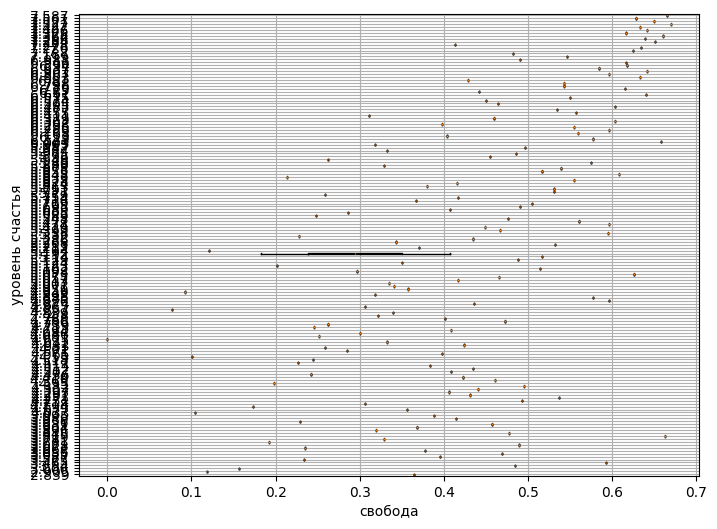

In [45]:

# Группировка данных по уровню счастья
grouped = df.groupby('Happiness Score')['Freedom'].apply(list)

# Сортировка уникальных значений уровня счастья
sorted_scores = sorted(df['Happiness Score'].unique())

# Создание списка значений свободы для каждого уровня счастья
values = [grouped[score] for score in sorted_scores]

# Построение box whisker chart
plt.figure(figsize=(8, 6))
plt.boxplot(values, labels=sorted_scores, vert=False)
plt.xlabel('свобода')
plt.ylabel('уровень счастья')
plt.grid(True)
plt.show()

3. Облако точек зависимости уровня "счастья" от уровня ВВП страны;

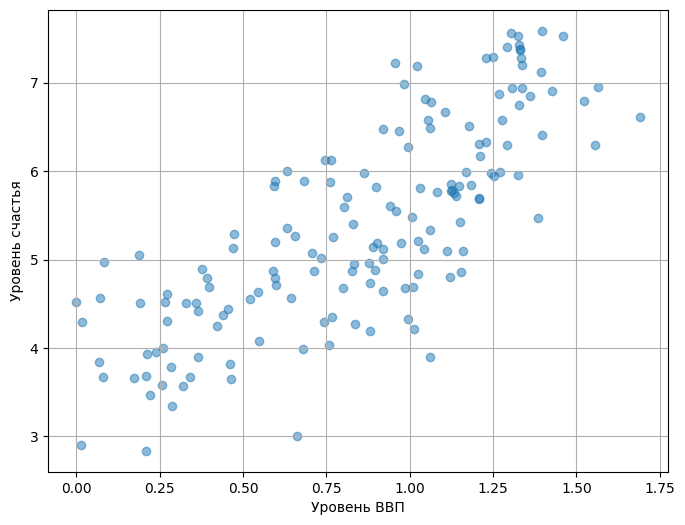

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'], alpha=0.5)
plt.xlabel('Уровень ВВП')
plt.ylabel('Уровень счастья')
plt.grid(True)
plt.show()

4. Распределение по столбцу Family для различных значений уровня "счастья";

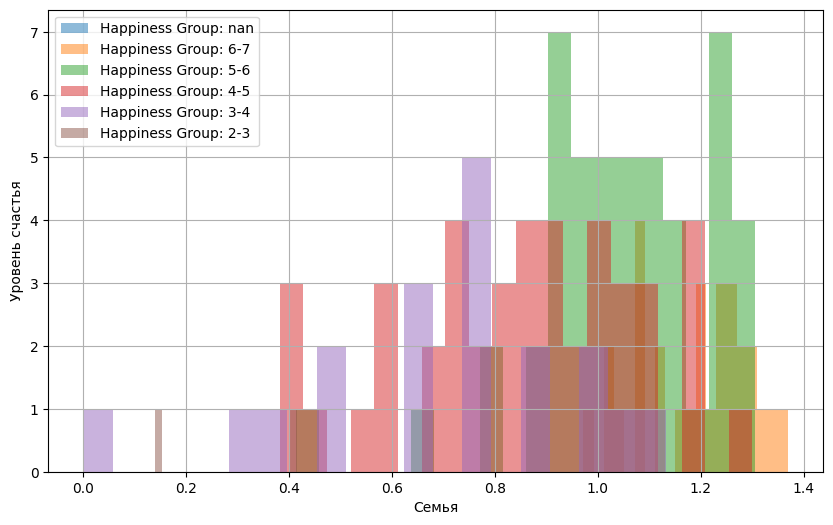

In [59]:
bins = list(range(1,8))

df['Happiness Group'] = pd.cut(df['Happiness Score'], bins=bins, labels=['1-2', '2-3', '3-4', '4-5', '5-6', '6-7'])

plt.figure(figsize=(10, 6))
for group in df['Happiness Group'].unique():
    plt.hist(df[df['Happiness Group'] == group]['Family'], bins=20, alpha=0.5, label=f'Happiness Group: {group}')

plt.xlabel('Семья')
plt.ylabel('Уровень счастья')
plt.legend()
plt.grid(True)
plt.show()

5. Добавить в набор данных столбец с указанием экономического мира страны ("первый мир", "второй мир" и "третий мир") и визуализировать топ-5 стран с наивысшим рейтингом "счастья" для каждого из миров.


In [75]:
# Определение границ для каждого мира на основе ВВП на душу населения
first_world_boundary = 1.0  
second_world_boundary = 0.5 
third_world_boundary = 0.1  

def define_world(row):
    if row['Economy (GDP per Capita)'] > first_world_boundary:
        return 'Первый мир'
    elif row['Economy (GDP per Capita)'] > second_world_boundary:
        return 'Второй мир'
    elif row['Economy (GDP per Capita)'] > third_world_boundary:
        return 'Третий мир'
    else:
        return 'Четвертый мир'

df['Economic World'] = df.apply(define_world, axis=1)

top_countries_per_world = df.groupby('Economic World').apply(lambda x: x.nlargest(5, 'Happiness Score')).reset_index(drop=True)

for world, group in top_countries_per_world.groupby('Economic World'):
    print(f"Топ-5 стран для {world}:")
    print(group[['Country', 'Happiness Score']],"\n")

Топ-5 стран для Второй мир:
      Country  Happiness Score
0  Costa Rica            7.226
1      Brazil            6.983
2    Colombia            6.477
3    Thailand            6.455
4    Suriname            6.269 

Топ-5 стран для Первый мир:
       Country  Happiness Score
5  Switzerland            7.587
6      Iceland            7.561
7      Denmark            7.527
8       Norway            7.522
9       Canada            7.427 

Топ-5 стран для Третий мир:
              Country  Happiness Score
10         Kyrgyzstan            5.286
11             Zambia            5.129
12  Somaliland region            5.057
13            Lesotho            4.898
14         Tajikistan            4.786 

Топ-5 стран для Четвертый мир:
             Country  Happiness Score
15        Mozambique            4.971
16           Liberia            4.571
17  Congo (Kinshasa)            4.517
18            Malawi            4.292
19             Niger            3.845 

